In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# Preview dataset
df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


/tmp/ipython-input-5-877089587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')


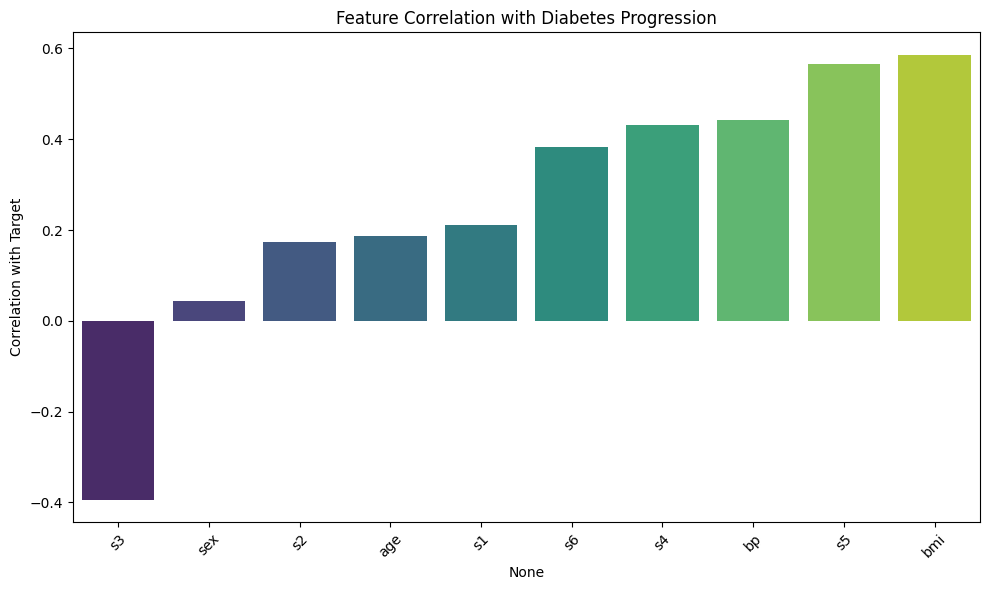

In [5]:
plt.figure(figsize=(10, 6))
correlations = df_diabetes.corr()['target'].drop('target').sort_values()
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.title("Feature Correlation with Diabetes Progression")
plt.ylabel("Correlation with Target")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target
X = df_diabetes.drop('target', axis=1)
y = df_diabetes['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 2900.19
R² Score: 0.45


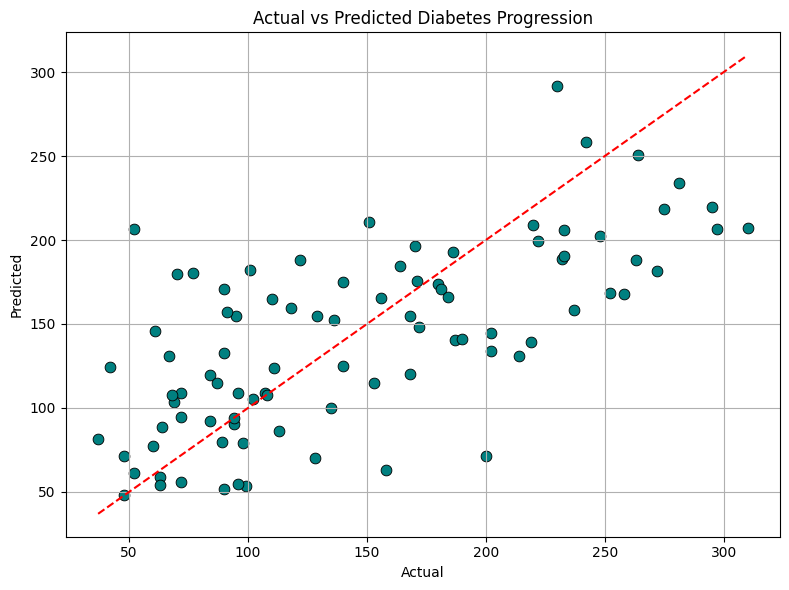

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60, edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title("Actual vs Predicted Diabetes Progression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


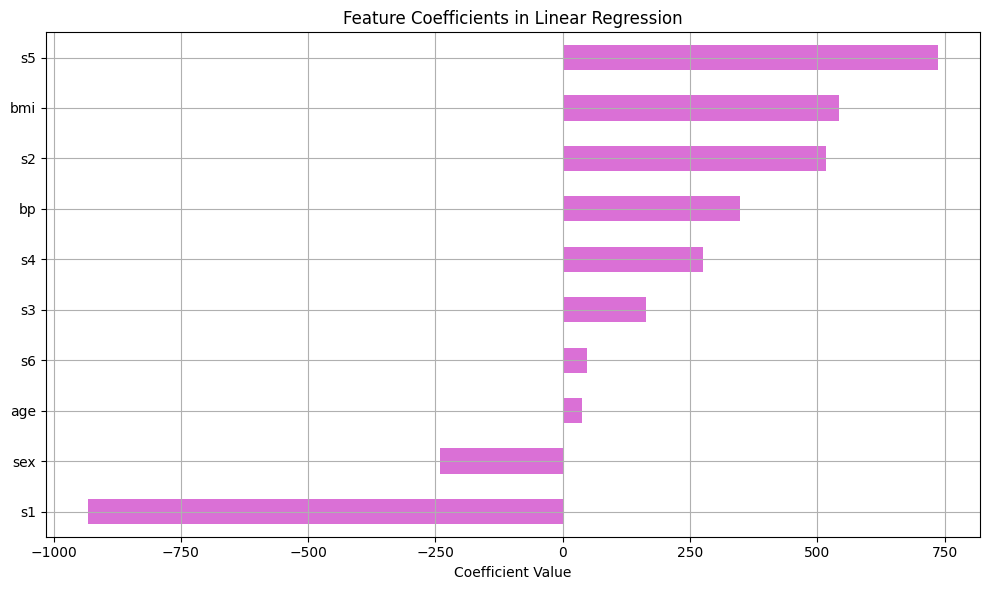

In [9]:
coefficients = pd.Series(model.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh', color='orchid')
plt.title("Feature Coefficients in Linear Regression")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()
